# WSI LAB 5 - Sztuczna sieć neuronowa

> autorzy: Bartosz Han, Igor Matynia

Wspólnie zaimplementowaliśmy klasyfikator używający wielowarstwowej sieci neuronowej. Na ostatniej warstwie sieci znajduje się N neuronów odpowiadajcych kolejnym N klasom. W naszym algorytmie uwzględniliśmy normalizację danych wejściowych, mini-batching oraz stochastic gradient descent.

## Eksperyment 1:
W tym eksperymencie zbadamy wpływ ilości neuronów warstwy ukrytej na jakość sieci. W każdym z doświadczeń:
 - sieć ma 1 warstwę ukrytą
 - liczba epok to 100
 - learning rate = 0.02
 - dane treningowe dzielone są na 30 minibatch'y
 - funkcją aktywacji jest tanh, funkcją błędu jest średni błąd kwadratowy

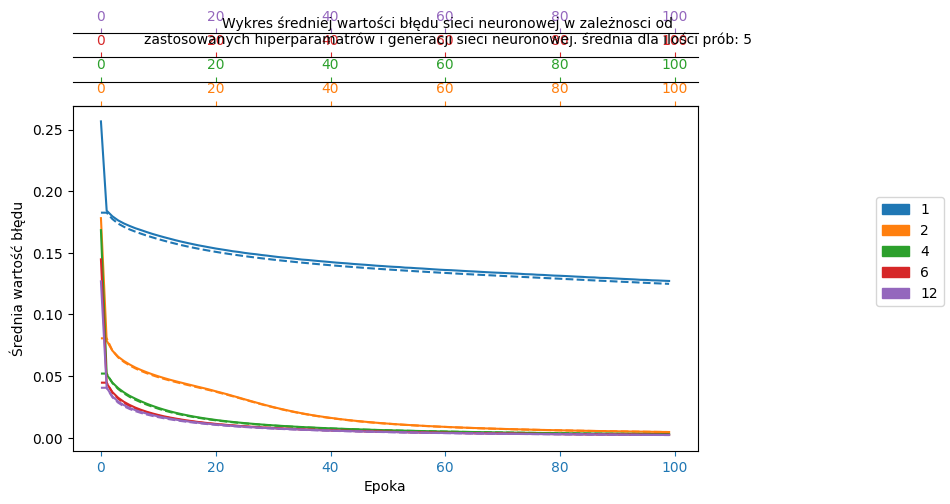

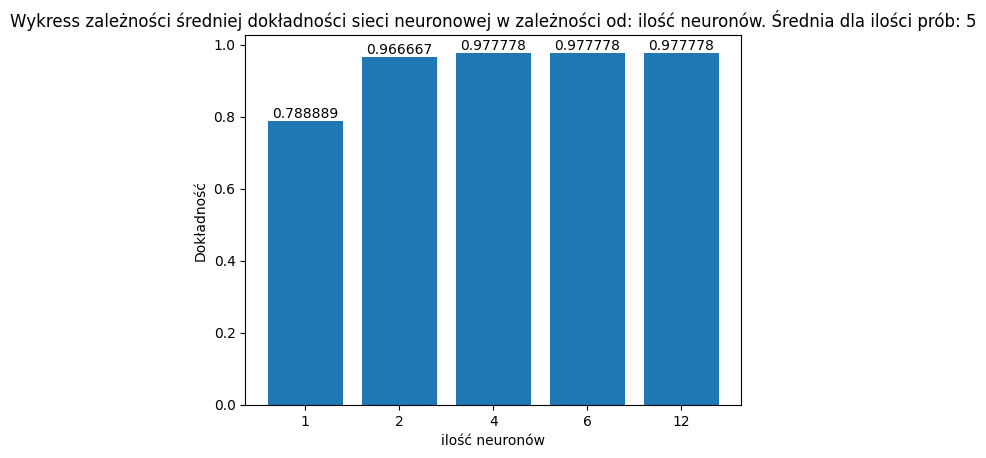

In [6]:
import warnings

warnings.filterwarnings('ignore')

from plots import plot_classification_results, plot_classification_results_history
from functions import *

# opis warstwy wyjściowej
lli = [tanh_function, tanh_derivative]
# opisy warstw ukrytych dla koszczególnych eksperymentów
hli1 = [[1, tanh_function, tanh_derivative]]
hli2 = [[2, tanh_function, tanh_derivative]]
hli4 = [[4, tanh_function, tanh_derivative]]
hli6 = [[6, tanh_function, tanh_derivative]]
hli12 = [[12, tanh_function, tanh_derivative]]
epochs = 100
# hiperparametry eksperymentów
hiperparams_set = [
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli1, epochs, 0.02, 30],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli2, epochs, 0.02, 30],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli4, epochs, 0.02, 30],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli6, epochs, 0.02, 30],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli12, epochs, 0.02, 30],
]
description = ["1", "2", "4", "6", "12"]
n_runs = 5
plot_classification_results_history(hiperparams_set, description, n_runs)
plot_classification_results(hiperparams_set, "ilość neuronów", description, n_runs)

## Wnioski
W przypadku liczby neuronów większej równej 2 jakość sieci utrzymuje się na podobnym poziomie. Jakość jest jednak znacznie niższa dla sieci z tylko jednym neuronem ukrytym. Biorąc to pod uwagę optymaną ilością neuronów dla jednej warstwy ukrytej jest około 3. Taka liczba zapewnia szybkie wykonywanie operacji na sieci neuronowej oraz zadowalającą dokładność klasyfikacji.

## Ekperyment 2:
W tym eksperymencie zbadamy wpływ współczynnika uczenia na jakość sieci i dynamikę jej uczenia. W każdym z doświadczeń:
 - sieć ma 1 warstwę ukrytą
 - liczba neuronów warstwy ukrytej to 3
 - liczba epok to 50
 - dane treningowe dzielone są na 30 minibatch'y
 - funkcją aktywacji jest tanh, funkcją błędu jest średni błąd kwadratowy

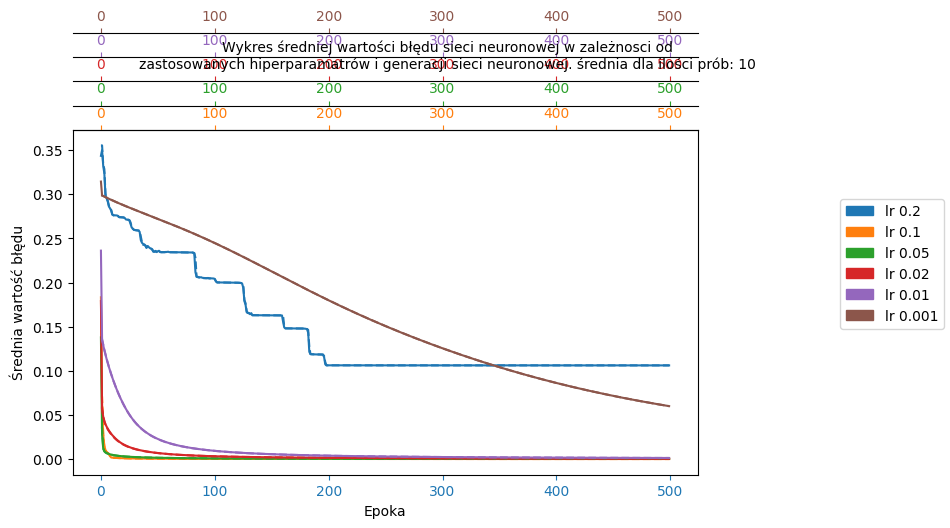

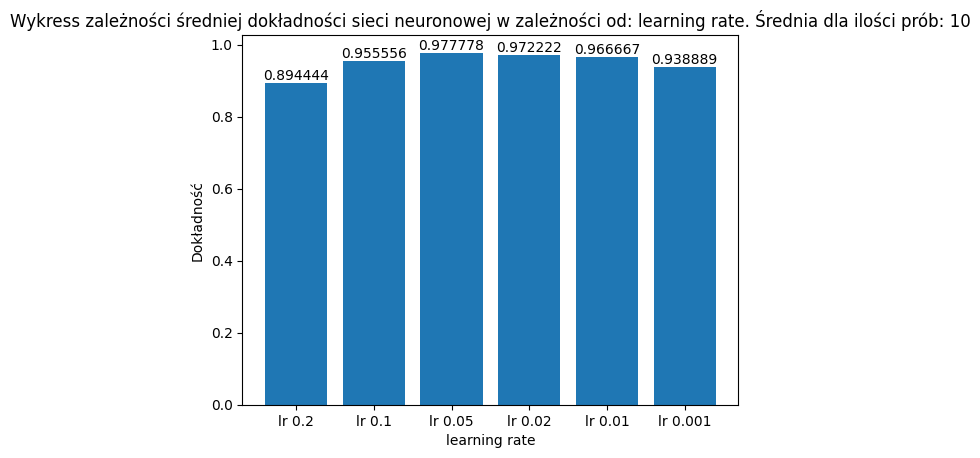

In [2]:
import warnings

warnings.filterwarnings('ignore')

from plots import plot_classification_results, plot_classification_results_history
from functions import *

lli = [tanh_function, tanh_derivative]
hli = [[3, tanh_function, tanh_derivative]]
epochs = 500
n_runs = 10
hyperparams_set = [
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, 0.2, 30],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, 0.1, 30],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, 0.05, 30],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, 0.02, 30],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, 0.01, 30],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, 0.001, 30],
]
test_names = ["lr 0.2", "lr 0.1", "lr 0.05", "lr 0.02", "lr 0.01",
              "lr 0.001"]
plot_classification_results_history(hyperparams_set, test_names, n_runs)
plot_classification_results(hyperparams_set, "learning rate", test_names, n_runs)

## Wnioski:
Z zebranych danych wynika, że dla coraz to mniejszych współczynników uczenia, nauczenie sieci zajmuje coraz dłużej, gdyż wykonywane kroki w przestrzeni są mniejsze. Ale za to rozwiązanie końcowe będzie tym dokładniejsze im mniejszy jest krok. Na wykresie widać jak dla lr = 0.001 wykres błędu na przestrzeni aż 500 epok bardzo powoli zbliża się do 0, za to dla lr rzędu 0.1, 0.05 porównywalny wynik jest osiągany jeszcze przed 50. epoką. Biorąc te fakty pod uwagę, optymalnym wpsółczynnikiem uczenia będzie około 0.05. Zapewnia on szybkie uczenie i zadowalającą dokładność.

## Eksperyment 3
W tym eksperymencie usiłujemy przeuczyć sieć neuronową. W tym celu ma ona 2 warstwy, po 20 neuronów każda oraz jest ona uczona na przestrzeni 10000 epok.

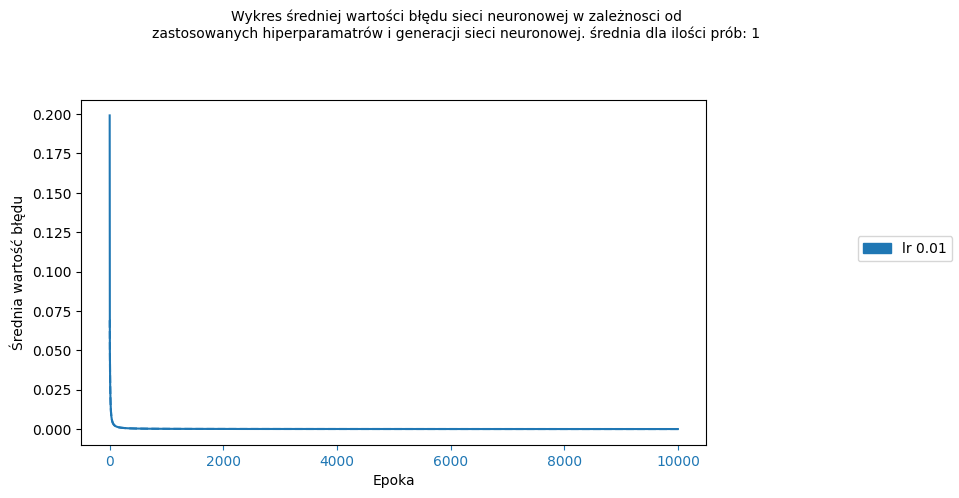

In [3]:
import warnings

warnings.filterwarnings('ignore')

from plots import plot_classification_results, plot_classification_results_history
from functions import *

lli = [tanh_function, tanh_derivative]
hli = [[20, tanh_function, tanh_derivative],
       [20, tanh_function, tanh_derivative], ]
epochs = 10000
n_runs = 1
hyperparams_set = [
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, 0.01, 30],
]
test_names = ["lr 0.01"]
plot_classification_results_history(hyperparams_set, test_names, n_runs)

## Wnioski
Pomimo starań nie widać znaczącego obniżenia w jakości w związku z przeuczeniem. Jest to prawdopodobnie spowodowane specyfiką zbioru danych

## Eksperyment 4
W tym eksperymencie zbadamy wpływ ilości warstw na jakość i dynamikę uczenia sieci. W każdym z doświadczeń:
 - liczba neuronów warstwy ukrytej to 4
 - liczba epok to 150
 - dane treningowe dzielone są na 30 minibatchów
  - współczynnik uczenia wynosi 0.05
 - funkcją aktywacji jest tanh, funkcją błędu jest średni błąd kwadratowy

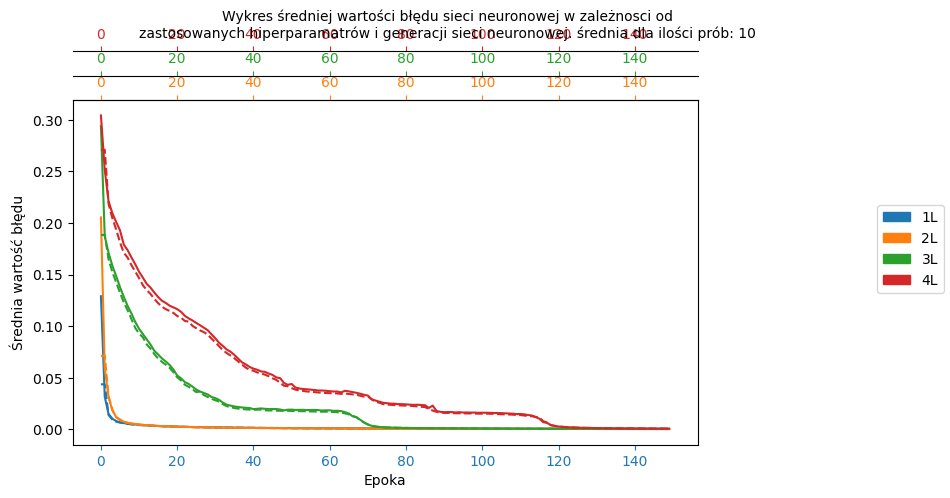

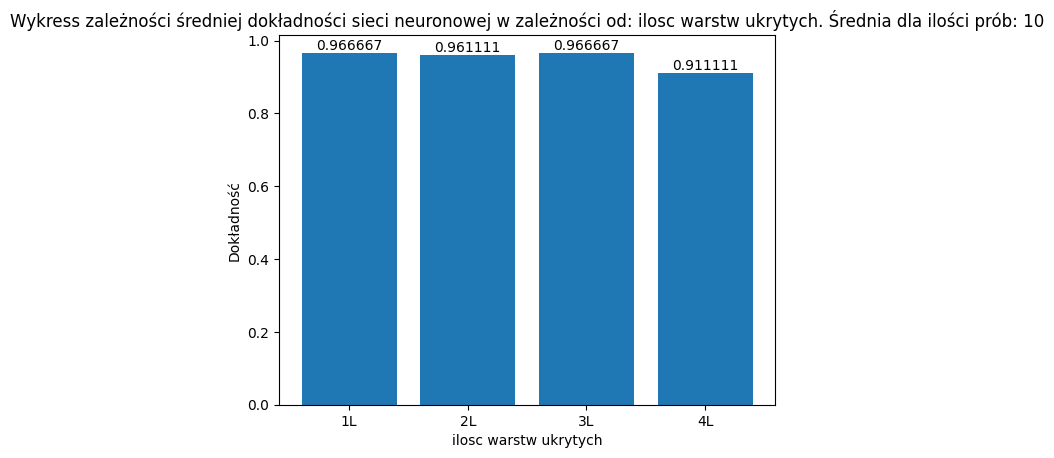

In [4]:
import warnings

warnings.filterwarnings('ignore')

from plots import plot_classification_results, plot_classification_results_history
from functions import *

lli = [tanh_function, tanh_derivative]
hli1 = [[4, tanh_function, tanh_derivative]]
hli2 = [[4, tanh_function, tanh_derivative], [4, tanh_function, tanh_derivative]]
hli3 = [[4, tanh_function, tanh_derivative], [4, tanh_function, tanh_derivative], [4, tanh_function, tanh_derivative]]
hli4 = [[4, tanh_function, tanh_derivative], [4, tanh_function, tanh_derivative], [4, tanh_function, tanh_derivative],
        [4, tanh_function, tanh_derivative]]
epochs = 150
n_runs = 10
learn_rate = 0.05
batches = 30
hyperparams_set = [
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli1, epochs, learn_rate, batches],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli2, epochs, learn_rate, batches],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli3, epochs, learn_rate, batches],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli4, epochs, learn_rate, batches],
]
test_names = ["1L", "2L", "3L", "4L"]
plot_classification_results_history(hyperparams_set, test_names, n_runs)
plot_classification_results(hyperparams_set, "ilosc warstw ukrytych", test_names, n_runs)

## Wnioski:
Z zebranych danych wynika, że im większa jest liczba warstw tym dłużej zajmuje trenowanie sieci. Zwiększa się też ryzyko przeuczenia, szczególnie dla tak małej ilości danych wejściowych. W naszym wypadku jedna warstwa ukryta jest w zupełności wystarczająca.

## Eksperyment 5
W tym eksperymencie zbadamy wpływ ilości batch'y na jakość i dynamikę uczenia się sieci. W każdym z doświadczeń:
 - sieć ma 1 warstwę ukrytą
 - liczba neuronów warstwy ukrytej to 3
 - liczba epok to 50
 - współczynnik uczenia wynosi 0.05
 - funkcją aktywacji jest tanh, funkcją błędu jest średni błąd kwadratowy

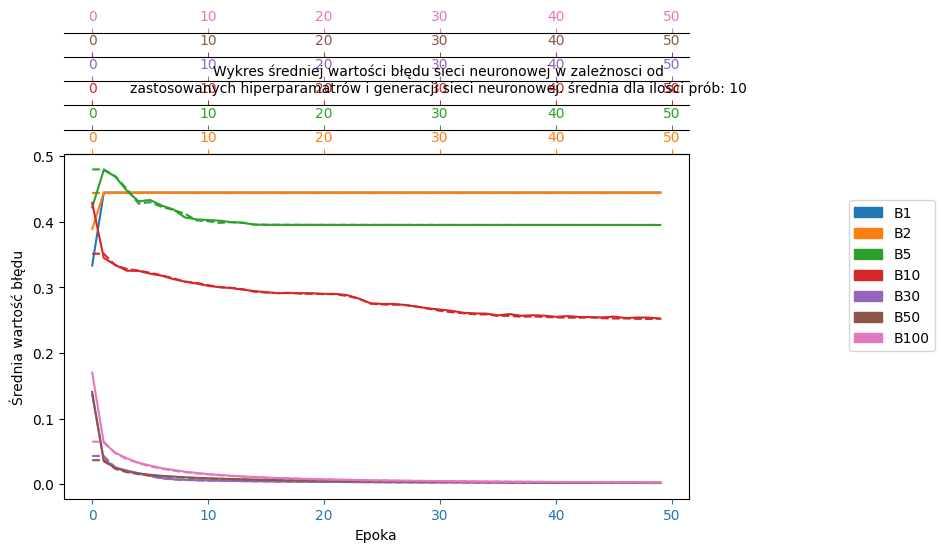

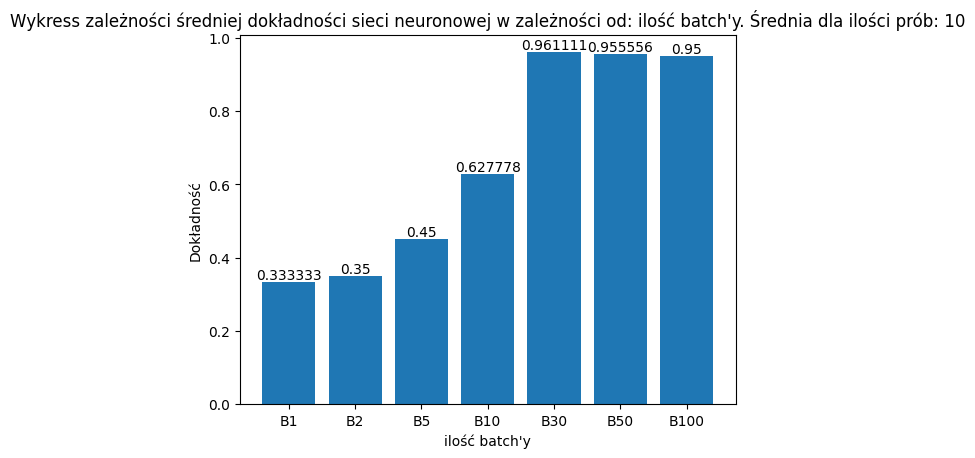

In [5]:
import warnings

warnings.filterwarnings('ignore')

from plots import plot_classification_results, plot_classification_results_history
from functions import *

lli = [tanh_function, tanh_derivative]
hli = [[3, tanh_function, tanh_derivative]]
epochs = 50
n_runs = 10
learn_rate = 0.05
hyperparams_set = [
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, learn_rate, 1],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, learn_rate, 2],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, learn_rate, 5],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, learn_rate, 10],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, learn_rate, 30],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, learn_rate, 50],
    [mean_squared_error_function, mean_squared_error_derivative_function, lli, hli, epochs, learn_rate, 100],
]
test_names = ["B1", "B2", "B5", "B10", "B30", "B50", "B100"]
plot_classification_results_history(hyperparams_set, test_names, n_runs)
plot_classification_results(hyperparams_set, "ilość batch'y", test_names, n_runs)

## Wnioski
Dla zbyt małej ilości batchy gradient jest uśredniony z zbyt dużej ilości punktów danych, więc traci zbyt dużo informacji z każdego sampla. Dla zbyt duże ilości batchy natomiast, każdy punk danych ma duży wpływ na zmiany wag. Optymalną ilością batchy dla tych danych okazuje się 30.

## Podsumowanie
Podsumowując powyżej zebrane dane, optymalna sieć do klasyfikowania danych WINE będzie się składała z:
 - 1 warstwy ukrytej
 - 3 neuronów ukrytych
 - współczynnika uczenia równego 0.05
 - około 20 mini batchy
 - powinna być uczona na około 100 epokach